# GEONE - Tools to deal with 2D RGB images

Functions to read, write and show images 2D RGB images:

- read from file in format png, ppm, (jpeg),
- link with geone image (`geone.img.Img` class).

Use package Pillow (PIL) for advanced image manipulation and various file formats.

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# import package 'geone'
import geone as gn

In [2]:
# Show version of python and version of geone
import sys 
print(sys.version_info)
print('geone version: ' + gn.__version__)

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)
geone version: 1.2.17


## Read / Write 2D RGB image files
The function `geone.img.readImage2Drgb` allows to read (load) 2D images with RGB (or RGBA) channels from file in various format (png, ppm(, jpeg)) (based on `matplotlib.pyplot.imread`) and to fill an instance of `geone.img.Img` class.

The function `geone.img.writeImage2Drgb` allows to write (save) an image (based on `matplotlib.pyplot.imsave`) from a `geone.img.Img` class instance in a file, in format png, ppm(, jpeg). The input image (`geone.img.Img` class) should be in 2D with one variable, 3 variables (channels RGB) or 4 variables (channels RGBA). If the input image has only one variable, it is transformed in a RGB(A) color code via a list of color or a colormap.

See examples below for more details.

Notes:

- `geone.img.readImage2Drgb` (`matplotlib.pyplot.imread`) allows more file format than `geone.img.writeImage2Drgb` (`matplotlib.pyplot.imsave`), e.g. 'tif',
- format 'jpeg' renders *blurred images*, so they should avoid at least for categorical images.

### Dealing with "missing value"
The function `geone.img.readImage2Drgb` allows to specify a color that is considered as a "missing value" (coded by `nan`) in the output geone image.

The function `geone.img.writeImage2Drgb` allows to specify the color to be used for "missing_value" (`nan`) in the input geone image.

See examples below for more details.

In [3]:
# Set output directory for generated files
out_dir = 'out'

if not os.path.isdir(out_dir):
    os.mkdir(out_dir)

## I. Example with "continuous" image

### Reading / loading image
The function `geone.img.readImage2Drgb` returns an image (`geone.img.Img` class) with:

- 3 or 4 variables (keyword argument `keep_channels=True` (default)), the variables (with value in the interval $[0, 1]$) being the RGB or RGBA channels,
- 1 variable (keyword argument `keep_channels=False`), the variable (with value in the interval $[0, 1]$) being a linear combination of the RGB channels using the weight given by the keyword argument `rgb_weight`.

In [4]:
# Directory containing the input files
data_dir = 'data'

# Filename of the initial image, without extension
fbase = 'imCont'

# Extension
ext = 'png'

### I. 1 Continuous image - keeping RGB(A) channels

#### Read file with `matplotlib.pyplot.imread` and show it with `matplotlib.pyplot.imshow`

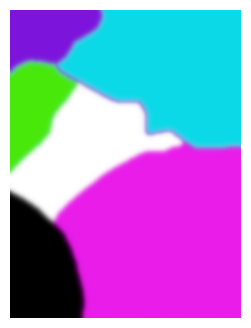

In [5]:
# Read the image from initial file using matplotlib.pyplot.imread and show it
im = plt.imread(os.path.join(data_dir, f'{fbase}.{ext}'))
plt.figure(figsize=(4,4))
plt.imshow(im)
plt.axis('off')
plt.show()

#### Read file using dedicated function of geone (`geone.img.readImage2Drgb`)

In [6]:
# Read the image from initial file, keeping RGB(A) channels
im_cont = gn.img.readImage2Drgb(os.path.join(data_dir, f'{fbase}.{ext}'))

# Show info
print('Geone image (gn.img.Img):\n', im_cont)

Geone image (gn.img.Img):
 *** Img object ***
name = ''
(nx, ny, nz) = (300, 400, 1) # number of cells along each axis
(sx, sy, sz) = (1.0, 1.0, 1.0) # cell size (spacing) along each axis
(ox, oy, oz) = (0.0, 0.0, 0.0) # origin (coordinates of bottom-lower-left corner)
nv = 3  # number of variable(s)
varname = ['red', 'green', 'blue']
val: (3, 1, 400, 300)-array
*****


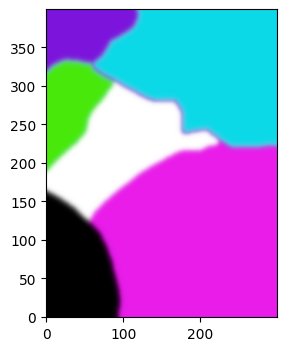

In [7]:
# Plot the image with gn.imgplot.drawImage2Drgb (recombining the RGB(A) channels)
plt.figure(figsize=(4,4))
gn.imgplot.drawImage2Drgb(im_cont)
plt.show()

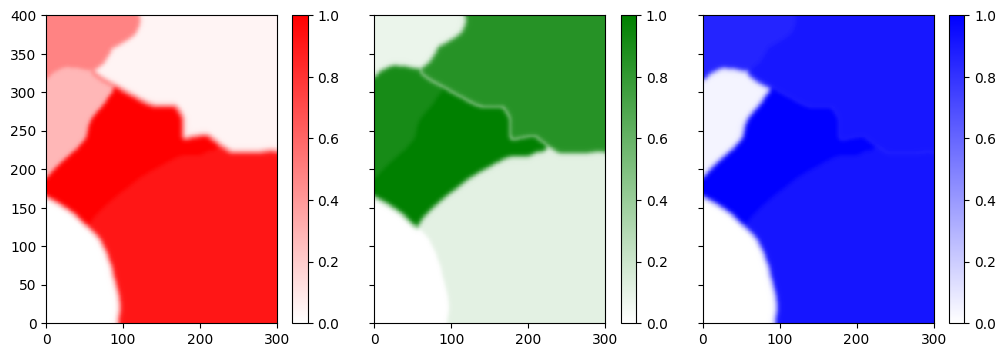

In [8]:
# Plot the three variables (RGB channels) of the image with gn.imgplot.drawImage2D
plt.subplots(1,3, sharey=True, figsize=(12,4))
plt.subplot(1,3,1)
gn.imgplot.drawImage2D(im_cont, iv=0, cmap=gn.customcolors.custom_cmap(['white', 'red']))
plt.subplot(1,3,2)
gn.imgplot.drawImage2D(im_cont, iv=1, cmap=gn.customcolors.custom_cmap(['white', 'green']))
plt.subplot(1,3,3)
gn.imgplot.drawImage2D(im_cont, iv=2, cmap=gn.customcolors.custom_cmap(['white', 'blue']))
plt.show()

#### Writing / saving image

In [9]:
# output file 
out_file = f'{fbase}_new.{ext}'
f = os.path.join(out_dir, out_file)
gn.img.writeImage2Drgb(f, im_cont)

# Read the image from the written file
im_cont_new = gn.img.readImage2Drgb(f)
if im_cont.nv == 3:
    im_cont_new.resize(iv0=0, iv1=3) # keep only the first three channels (remove alpha channel)
print('Same geone images (im_cont and im_cont_new) ?', gn.img.isImageEqual(im_cont, im_cont_new))

Same geone images (im_cont and im_cont_new) ? True


In [10]:
# Note: if the image read with matplotlib.pyplot.imread is saved with matplotlib.pyplot.imsave,
# we get the same file as the file written just above

# output file 
out_file = f'{fbase}_copy.{ext}'
f = os.path.join(out_dir, out_file)
plt.imsave(f, im)

#### Dealing with missing value

In [11]:
nancol = im_cont.val[:,0,0,0] # color code of first pixel (in bottom left corner), in initial image

# Read the image from the initial file, specifying a color to be interpreted as missing value
im_cont_x = gn.img.readImage2Drgb(os.path.join(data_dir, f'{fbase}.{ext}'), nancol=nancol)

print('Number of pixel with missing value: ', np.any(np.isnan(im_cont_x.val), axis=0).sum())

Number of pixel with missing value:  9606


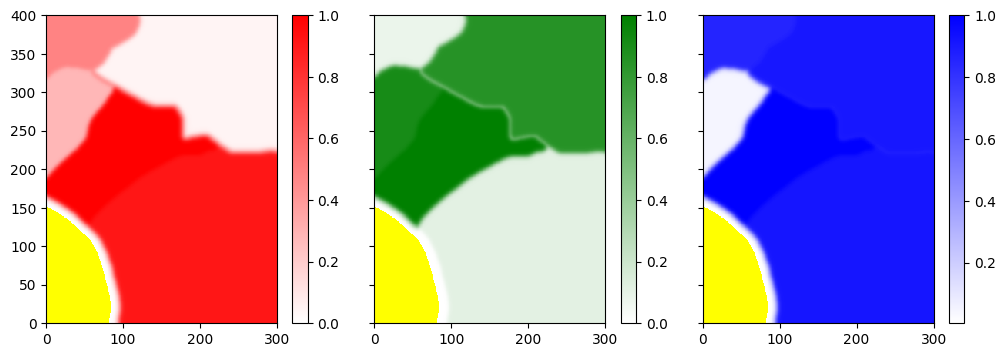

In [12]:
# Plot the three variables (RGB channels) of the image with gn.imgplot.drawImage2D 
# (with missing value in yellow)
plt.subplots(1,3, sharey=True, figsize=(12,4))
plt.subplot(1,3,1)
gn.imgplot.drawImage2D(im_cont_x, iv=0, cmap=gn.customcolors.custom_cmap(['white', 'red'], cbad='yellow'))
plt.subplot(1,3,2)
gn.imgplot.drawImage2D(im_cont_x, iv=1, cmap=gn.customcolors.custom_cmap(['white', 'green'], cbad='yellow'))
plt.subplot(1,3,3)
gn.imgplot.drawImage2D(im_cont_x, iv=2, cmap=gn.customcolors.custom_cmap(['white', 'blue'], cbad='yellow'))
plt.show()

In [13]:
# Write image accounting for missing value
out_file = f'{fbase}_x_new.{ext}' # output file 
f = os.path.join(out_dir, out_file)
gn.img.writeImage2Drgb(f, im_cont_x, nancol='yellow')

# Read the image from the written file
im_cont_x_new = gn.img.readImage2Drgb(f, nancol='yellow')
if im_cont_x.nv == 3:
    im_cont_x_new.resize(iv0=0, iv1=3) # keep only the first three channels (remove alpha channel)
print('Same geone images (im_cont_x and im_cont_x_new) ?', gn.img.isImageEqual(im_cont_x, im_cont_x_new))

Same geone images (im_cont_x and im_cont_x_new) ? True


### I. 2 Continuous image - combining RGB channels

In [14]:
# Read the image from the initial file, combining RGB channels: one output variable consisting 
# of a linear combination of the RGB code of the color in the original file; weight of RGB channels 
# are set with keyword argument 'rgb_weight'
im_cont_onevar = gn.img.readImage2Drgb(os.path.join(data_dir, f'{fbase}.{ext}'), keep_channels=False)

# Show info
print('Geone image (gn.img.Img):\n', im_cont_onevar)

Geone image (gn.img.Img):
 *** Img object ***
name = ''
(nx, ny, nz) = (300, 400, 1) # number of cells along each axis
(sx, sy, sz) = (1.0, 1.0, 1.0) # cell size (spacing) along each axis
(ox, oy, oz) = (0.0, 0.0, 0.0) # origin (coordinates of bottom-lower-left corner)
nv = 1  # number of variable(s)
varname = ['val']
val: (1, 1, 400, 300)-array
*****


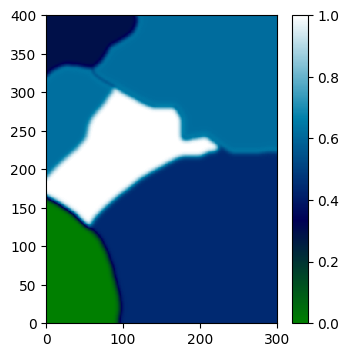

In [15]:
# Draw the image using a color map
plt.figure(figsize=(4,4))
gn.imgplot.drawImage2D(im_cont_onevar, cmap='ocean')
plt.show()

#### Writing / saving image
The RGB colors in the written file are set via a color map.

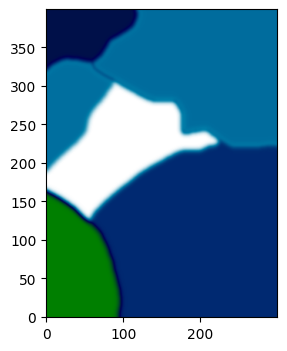

In [16]:
# output file 
out_file = f'{fbase}_onevar_new.{ext}' 
f = os.path.join(out_dir, out_file)
gn.img.writeImage2Drgb(f, im_cont_onevar, cmap='ocean') 

# Read the image from the written file (keeping RGB(A) channels) and plot it (recombining the RGB(A) channels)
im_cont_onevar_new = gn.img.readImage2Drgb(f) # keeping channels
plt.figure(figsize=(4,4))
gn.imgplot.drawImage2Drgb(im_cont_onevar_new)
plt.show()

#### Dealing with missing value

In [17]:
nancol = im_cont.val[:,0,0,0] # color code of first pixel (in bottom left corner), in initial image

# Read the image from the initial file, specifying a color to be interpreted as missing value
im_cont_onevar_x = gn.img.readImage2Drgb(os.path.join(data_dir, f'{fbase}.{ext}'), 
                                         nancol=nancol, keep_channels=False)

print('Number of pixel with missing value: ', np.any(np.isnan(im_cont_onevar_x.val), axis=0).sum())

Number of pixel with missing value:  9606


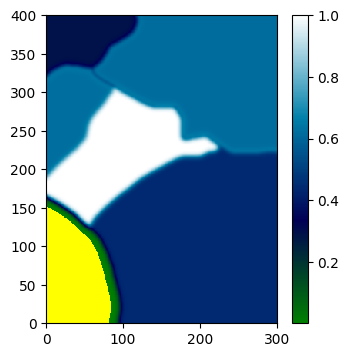

In [18]:
# Draw the image using a color map
# Define a color map from "ocean color map" and specifying a color for missing value (nan)
cmap = gn.customcolors.custom_cmap([plt.get_cmap('ocean')(x) for x in np.linspace(0,1,256)], ncol=256, 
                                   cbad='yellow')

plt.figure(figsize=(4,4))
gn.imgplot.drawImage2D(im_cont_onevar_x, cmap=cmap)
plt.show()

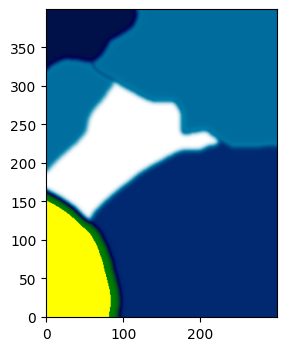

In [19]:
# Write image accounting for missing value
out_file = f'{fbase}_onevar_x_new.{ext}' # output file 
f = os.path.join(out_dir, out_file)
gn.img.writeImage2Drgb(f, im_cont_onevar_x, cmap=cmap, nancol='yellow') 

# Read the image from the written file (keeping RGB(A) channels) and plot it (recombining the RGB(A) channels)
im_cont_onevar_x_new = gn.img.readImage2Drgb(f) # keeping channels
plt.figure(figsize=(4,4))
gn.imgplot.drawImage2Drgb(im_cont_onevar_x_new)
plt.show()

## II. Example with "categorical" image

### Reading / loading image
If the image is considered as categorical (keyword argument `categ=True`), the function `geone.img.readImage2Drgb` returns an image (`geone.img.Img` class) with one variable taking values being indices (starting from $0$), where an index refers to the color of the pixel in a list of colors also retrieved in output. Each color in the list consists in a RGB or RGBA code (sequence of length 3 or 4 of values in $[0, 1]$) (keyword argument `keep_channels=True` (default)) or a float in $[0,1]$ resulting of a linear combination of the RGB code of the color (keyword argument `keep_channels=False`) using the weight given by the keyword argument `rgb_weight`. The output image `im` can be drawn (plotted) directly according to the output list of colors `col` by using:

- `geone.imgplot.drawImage2D(im, categ=True, categCol=col)` if keyword argument `keep_channels` was `True`;
- `geone.imgplot.drawImage2D(im, categ=True, categCol=[cmap(c) for c in col])`, where `cmap` is a color map function defined on the interval [0, 1], if keyword argument `keep_channels` was `False`.

In [20]:
# Filename of the initial image, without extension
fbase = 'imCat'

# Extension
ext = 'png'

### II. 1 Categorical image - keeping RGB(A) channels

#### Read file with `matplotlib.pyplot.imread` and show it with `matplotlib.pyplot.imshow`

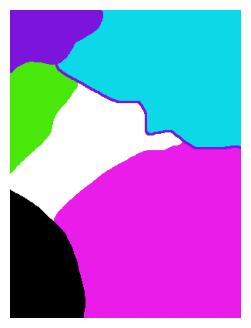

In [21]:
# Read the image from the initial file using matplotlib.pyplot.imread and show it
im = plt.imread(os.path.join(data_dir, f'{fbase}.{ext}'))
plt.figure(figsize=(4,4))
plt.imshow(im)
plt.axis('off')
plt.show()

#### Read file using dedicated function of geone (`geone.img.readImage2Drgb`)

In [22]:
# Read the image from the initial file and retrieve the geone image and the list of colors (RGBA code)
im_cat, col = gn.img.readImage2Drgb(os.path.join(data_dir, f'{fbase}.{ext}'), categ=True)

# Show info
print('Geone image (gn.img.Img):\n', im_cat)
print('Values of the variable (index of colors):', np.unique(im_cat.val))
print('List of colors (RGB(A) code):')
col

Geone image (gn.img.Img):
 *** Img object ***
name = ''
(nx, ny, nz) = (300, 400, 1) # number of cells along each axis
(sx, sy, sz) = (1.0, 1.0, 1.0) # cell size (spacing) along each axis
(ox, oy, oz) = (0.0, 0.0, 0.0) # origin (coordinates of bottom-lower-left corner)
nv = 1  # number of variable(s)
varname = ['code']
val: (1, 1, 400, 300)-array
*****
Values of the variable (index of colors): [0. 1. 2. 3. 4. 5.]
List of colors (RGB(A) code):


[array([0., 0., 0.], dtype=float32),
 array([0.04313726, 0.8509804 , 0.9098039 ], dtype=float32),
 array([0.28235295, 0.9098039 , 0.04313726], dtype=float32),
 array([0.4862745 , 0.07843138, 0.85882354], dtype=float32),
 array([0.9137255 , 0.10980392, 0.91764706], dtype=float32),
 array([1., 1., 1.], dtype=float32)]

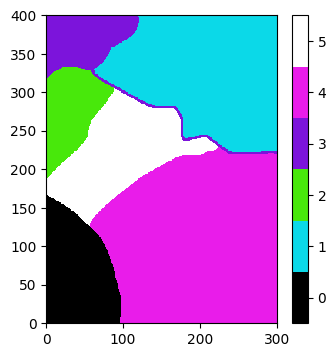

In [23]:
# Plot the image with gn.imgplot.drawImage2D
plt.figure(figsize=(4,4))
gn.imgplot.drawImage2D(im_cat, categ=True, categCol=col)
plt.show()

#### Writing / saving image

In [24]:
# output file
out_file = f'{fbase}_new.{ext}'
f = os.path.join(out_dir, out_file)
gn.img.writeImage2Drgb(f, im_cat, col=col)

# Read the image from the written file
im_cat_new, col_new = gn.img.readImage2Drgb(f, categ=True)
print('Same geone images (im_cat and im_cat_new) ?', gn.img.isImageEqual(im_cat, im_cat_new))
print('Same colors (col and col_new) ?', np.all([c[0:3] == cb[0:3] for c, cb in zip(col, col_new)]))

Same geone images (im_cat and im_cat_new) ? True
Same colors (col and col_new) ? True


In [25]:
# Note: if the image read with matplotlib.pyplot.imread is saved with matplotlib.pyplot.imsave,
# we get the same file as the file written just above

# output file 
out_file = f'{fbase}_copy.{ext}'
f = os.path.join(out_dir, out_file)
plt.imsave(f, im)

#### Dealing with missing value

In [26]:
nancol = col[2] # color code of the category "2" in initial image

# Read the image from the initial file, specifying a color to be interpreted as missing value
im_cat_x, col_x = gn.img.readImage2Drgb(os.path.join(data_dir, f'{fbase}.{ext}'), categ=True, nancol=nancol)

# Show info
print('Geone image (gn.img.Img):\n', im_cat_x)
print('Values of the variable (index of colors):', np.unique(im_cat_x.val))
print('List of colors (RGB(A) code):')
col_x

Geone image (gn.img.Img):
 *** Img object ***
name = ''
(nx, ny, nz) = (300, 400, 1) # number of cells along each axis
(sx, sy, sz) = (1.0, 1.0, 1.0) # cell size (spacing) along each axis
(ox, oy, oz) = (0.0, 0.0, 0.0) # origin (coordinates of bottom-lower-left corner)
nv = 1  # number of variable(s)
varname = ['code']
val: (1, 1, 400, 300)-array
*****
Values of the variable (index of colors): [ 0.  1.  2.  3.  4. nan]
List of colors (RGB(A) code):


[array([0., 0., 0.]),
 array([0.04313726, 0.8509804 , 0.90980393]),
 array([0.48627451, 0.07843138, 0.85882354]),
 array([0.9137255 , 0.10980392, 0.91764706]),
 array([1., 1., 1.])]

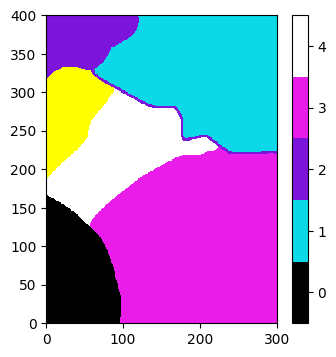

In [27]:
# Plot the image with gn.imgplot.drawImage2D (with missing value in yellow)
plt.figure(figsize=(4,4))
gn.imgplot.drawImage2D(im_cat_x, categ=True, categCol=col_x, categColbad='yellow')
plt.show()

In [28]:
# Write image accounting for missing value
out_file = f'{fbase}_x_new.{ext}' # output file
f = os.path.join(out_dir, out_file)
gn.img.writeImage2Drgb(f, im_cat_x, col=col_x, nancol='yellow')

# Read the image from the written file
im_cat_x_new, col_x_new = gn.img.readImage2Drgb(f, categ=True, nancol='yellow')
print('Same geone images (im_cat_x_new and im_cat_x_new) ?', gn.img.isImageEqual(im_cat_x, im_cat_x_new))
print('Same colors (col_x and col_x_new) ?', np.all([c[0:3] == cb[0:3] for c, cb in zip(col_x, col_x_new)]))

Same geone images (im_cat_x_new and im_cat_x_new) ? True
Same colors (col_x and col_x_new) ? True


### II. 2 Categorical image - combining RGB channels

In [29]:
# Read the image from the initial file and retrieve the geone image and the list of colors.
# Each color is a number in [0,1], resulting of a linear combination of the RGB code of the color 
# in the original file; weight of RGB channels are set with keyword argument 'rgb_weight'
im_cat_b, col_b = gn.img.readImage2Drgb(os.path.join(data_dir, f'{fbase}.{ext}'), 
                                        categ=True, keep_channels=False)

# Show info
print('Same geone images (im_cat and im_cat_b) ?', gn.img.isImageEqual(im_cat, im_cat_b))
print('List of colors (rate in [0,1]):', col_b)

Same geone images (im_cat and im_cat_b) ? True
List of colors (rate in [0,1]): [0.         0.61614118 0.62339609 0.28934118 0.44227059 1.        ]


In [30]:
# Get RGB(A) colors via a color map
cmap = plt.get_cmap('gray')
col_b_rgb = [cmap(c) for c in col_b]
col_b_rgb

[(0.0, 0.0, 0.0, 1.0),
 (0.615686274509804, 0.615686274509804, 0.615686274509804, 1.0),
 (0.6235294117647059, 0.6235294117647059, 0.6235294117647059, 1.0),
 (0.2901960784313725, 0.2901960784313725, 0.2901960784313725, 1.0),
 (0.44313725490196076, 0.44313725490196076, 0.44313725490196076, 1.0),
 (1.0, 1.0, 1.0, 1.0)]

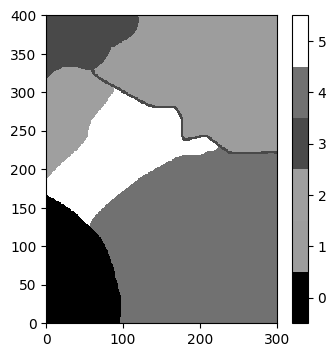

In [31]:
# Plot the image with gn.imgplot.drawImage2D
plt.figure(figsize=(4,4))
gn.imgplot.drawImage2D(im_cat_b, categ=True, categCol=col_b_rgb)
plt.show()

Note that due to the linear combination of RGB channels, the output colors can be very close.

#### Writing / saving image
The RGB colors in the written file can be first defined via a color map.

Same geone images (im_cat_b and im_cat_b_new) ? False


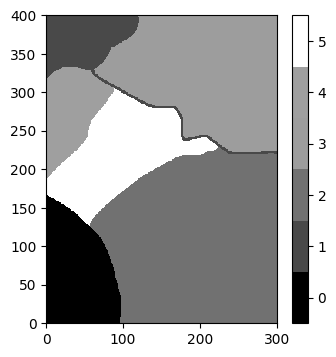

In [32]:
# output file
out_file = f'{fbase}_b_new.{ext}'
f = os.path.join(out_dir, out_file)
gn.img.writeImage2Drgb(f, im_cat_b, col=col_b_rgb) # use RGB(A) colors defined in col_b_rgb

# Read the image from the written file (keeping RGB(A) channels) and plot it (recombining the RGB(A) channels)
im_cat_b_new, col_b_new = gn.img.readImage2Drgb(f, categ=True) # keeping channels
print('Same geone images (im_cat_b and im_cat_b_new) ?', gn.img.isImageEqual(im_cat_b, im_cat_b_new))

plt.figure(figsize=(4,4))
gn.imgplot.drawImage2D(im_cat_b_new, categ=True, categCol=col_b_new)
plt.show()

Note that the colors are reordered (*i.e.* the variable values are reordered).

#### Dealing with missing value

In [33]:
nancol = col[2] # color code of the category "2" in initial image

# Read the image from the initial file, specifying a color to be interpreted as missing value
im_cat_b_x, col_b_x = gn.img.readImage2Drgb(os.path.join(data_dir, f'{fbase}.{ext}'), 
                                            categ=True, nancol=nancol, keep_channels=False)

# Show info
print('Same geone images (im_cat_x and im_cat_b_x) ?', gn.img.isImageEqual(im_cat_x, im_cat_b_x))
print('List of colors (rate in [0,1]):', col_b_x)

Same geone images (im_cat_x and im_cat_b_x) ? True
List of colors (rate in [0,1]): [0.         0.61614118 0.28934118 0.44227059 1.        ]


In [34]:
# Get RGB(A) colors via a color map
cmap = plt.get_cmap('gray')
col_b_x_rgb = [cmap(c) for c in col_b_x]
col_b_x_rgb

[(0.0, 0.0, 0.0, 1.0),
 (0.615686274509804, 0.615686274509804, 0.615686274509804, 1.0),
 (0.2901960784313725, 0.2901960784313725, 0.2901960784313725, 1.0),
 (0.44313725490196076, 0.44313725490196076, 0.44313725490196076, 1.0),
 (1.0, 1.0, 1.0, 1.0)]

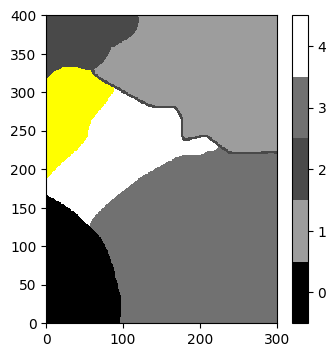

In [35]:
# Plot the image with gn.imgplot.drawImage2D
plt.figure(figsize=(4,4))
gn.imgplot.drawImage2D(im_cat_b_x, categ=True, categCol=col_b_x_rgb, categColbad='yellow')
plt.show()

Same geone images (im_cat_b_x and im_cat_b_x_new) ? False


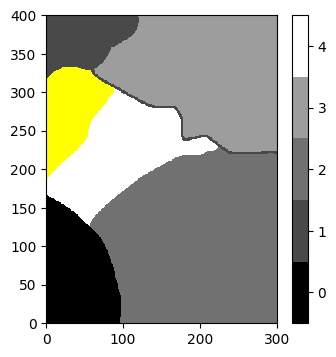

In [36]:
# Write image accounting for missing value
out_file = f'{fbase}_b_x_new.{ext}' # output file
f = os.path.join(out_dir, out_file)
gn.img.writeImage2Drgb(f, im_cat_b_x, col=col_b_x_rgb, nancol='yellow') # use RGB(A) colors def. in col_b_x_rgb

# Read the image from the written file (keeping RGB(A) channels) and plot it (recombining the RGB(A) channels)
im_cat_b_x_new, col_b_x_new = gn.img.readImage2Drgb(f, categ=True, nancol='yellow') # keeping channels
print('Same geone images (im_cat_b_x and im_cat_b_x_new) ?', gn.img.isImageEqual(im_cat_b_x, im_cat_b_x_new))

plt.figure(figsize=(4,4))
gn.imgplot.drawImage2D(im_cat_b_x_new, categ=True, categCol=col_b_x_new, categColbad='yellow')
plt.show()

Note that the colors are reordered (*i.e.* the variable values are reordered).